# Mass-Radius relationship

In [19]:
from astroutils.matplotlibrc import *
%pylab inline
from roche_q import calc_qr

Populating the interactive namespace from numpy and matplotlib


In [20]:
from scipy.interpolate import interp1d
from scipy.optimize import brentq

In [21]:
rcParams['font.size'] = 28
rcParams['xtick.major.pad']='8'

## Nuclear timescales (steep ZAMS)

In [22]:
q, r = calc_qr()

In [23]:
roche_relationship = interp1d(q, r)

In [24]:
X = np.logspace(.45, .7)
Y0 = X**3 / 150

Y1 = X**3 / 40

In [25]:
# Find the intersection of the Roche lobe with the later mass-radius relationship
Xprime = brentq(lambda x: roche_relationship(x) - x**3 / 40, 1, 10)

# Find the initial radius of this star
Yprime0 = Xprime**3 / 150
Yprime1 = Xprime**3 / 40

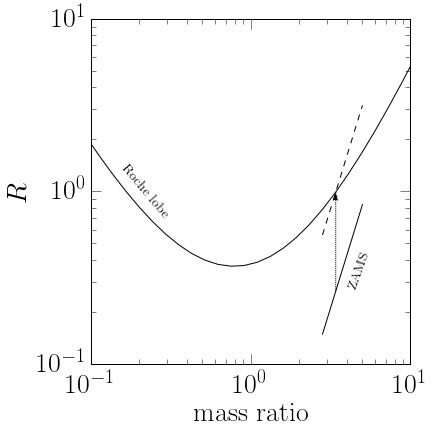

In [26]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.21, 0.15, 0.74, 0.8])

ax.plot(q, r, c='k')
ax.set_xlim([.1, 10])
ax.set_ylim([.1, 10])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'mass ratio')
ax.set_ylabel(r'$R$')

ax.plot(X, Y0, c='k')
ax.plot(X, Y1, c='k', linestyle='--')

# Add an arrow going up
ax.arrow(Xprime, Yprime0, 0, Yprime1 - Yprime0, color='k', head_width=.2, head_length=.1, 
         length_includes_head=True, linestyle=':');

ax.text(.15, 1.3, 'Roche lobe', fontsize=14, rotation=-50)
ax.text(4, .4, 'ZAMS', fontsize=14, rotation=70)
plt.savefig('mass_radius1.png', dpi=240, transparent=True)

## Thermal timescales (shallow ZAMS)

In [27]:
slope = .5
const1 = 10
const2 = 2

In [31]:
X0 = np.logspace(.25, .75)
Y0 = X0**slope / const1

X1 = np.logspace(np.log10(.4), .75)
Y1 = X1**slope / const2

In [32]:
# Find the intersection of the Roche lobe with the later mass-radius relationship
Xprime1 = brentq(lambda x: roche_relationship(x) - x**slope / const2, 1, 10)

# Find the initial radius of this star
Yprime0 = Xprime1**slope / const1
Yprime1 = Xprime1**slope / const2

# Find the second intersetion of the Roche lobe with the later mass-radius relationship
Xprime2 = brentq(lambda x: roche_relationship(x) - x**slope / const2, .1, 1)
Yprime2 = Xprime2**slope / const2

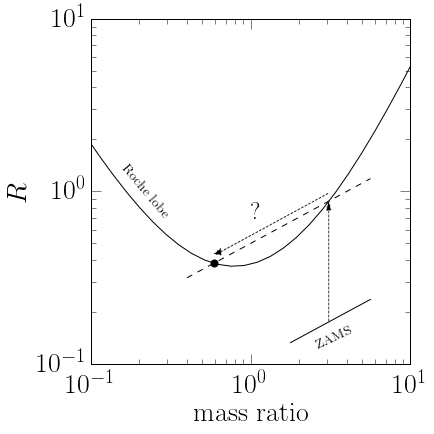

In [33]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.21, 0.15, 0.74, 0.8])

ax.plot(q, r, c='k')
ax.set_xlim([.1, 10])
ax.set_ylim([.1, 10])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'mass ratio')
ax.set_ylabel(r'$R$')

ax.plot(X0, Y0, c='k')
ax.plot(X1, Y1, c='k', linestyle='--')

ax.scatter(Xprime2, Yprime2, c='k', s=50)

# Add an arrow going up
ax.arrow(Xprime1, Yprime0, 0, Yprime1 - Yprime0, color='k', head_width=.2, head_length=.1, 
         length_includes_head=True, linestyle=':')
# Add an arrow going along the later mass-radius relationship
ax.arrow(Xprime1, Yprime1 + .1, Xprime2 - Xprime1, Yprime2 - .05 - Yprime1, color='k', head_width=Yprime2*.1, 
         head_length=Xprime1*.02, length_includes_head=True, linestyle=':')

ax.text(.15, 1.3, 'Roche lobe', fontsize=14, rotation=-50)
ax.text(2.5, .15, 'ZAMS', fontsize=14, rotation=25)
ax.text(1, .7, '?', fontsize=24)
plt.savefig('mass_radius2.png', transparent=True)